# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [74]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
print(penguins_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


## 1. Data Cleaning
Examine the dataset, identify outliers and null variables and remove them.

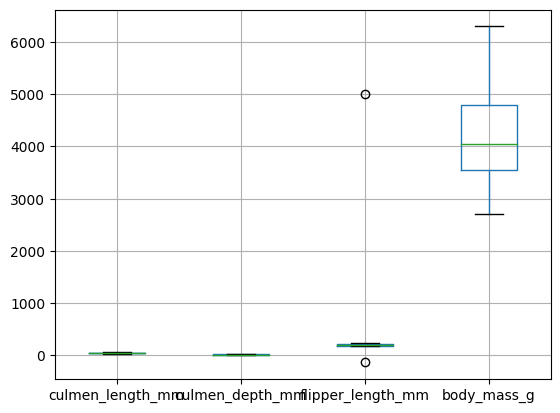

In [75]:
# Remove null variables
penguins_clean = penguins_df.dropna()

# Check for outliers
penguins_clean.boxplot()
plt.show()

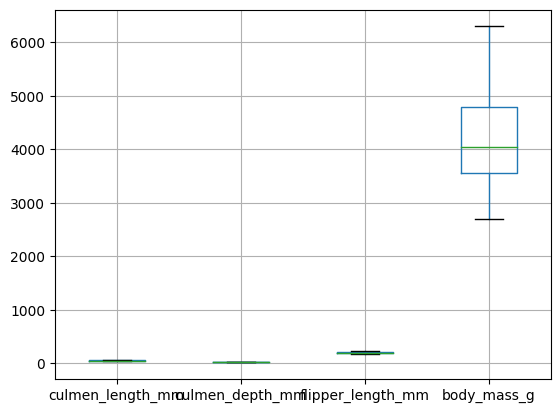

In [76]:
# Remove outliers
penguins_clean = penguins_clean[(penguins_clean['flipper_length_mm'] < 1000) & (penguins_clean['flipper_length_mm'] > 0)]
                                                                           
penguins_clean.boxplot()
plt.show()

## 2. Preprocessing
Create dummie variables for the available categorical features and standardize features for PCA process.

In [77]:
# One-hot encoding of sex
df = pd.get_dummies(penguins_clean).drop('sex_.', axis=1)
print(df.head())

   culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0              39.1             18.7  ...           0         1
1              39.5             17.4  ...           1         0
2              40.3             18.0  ...           1         0
4              36.7             19.3  ...           1         0
5              39.3             20.6  ...           0         1

[5 rows x 6 columns]


In [78]:
# Scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=scaled_df, columns=df.columns)
print(penguins_preprocessed)

     culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0           -0.905520         0.793126  ...   -0.991031  0.997001
1           -0.831938         0.128503  ...    1.009050 -1.003008
2           -0.684775         0.435252  ...    1.009050 -1.003008
3           -1.347011         1.099875  ...    1.009050 -1.003008
4           -0.868729         1.764498  ...   -0.991031  0.997001
..                ...              ...  ...         ...       ...
328          0.584511        -1.763116  ...    1.009050 -1.003008
329          0.510929        -1.456367  ...    1.009050 -1.003008
330          1.173166        -0.740619  ...   -0.991031  0.997001
331          0.216602        -1.200743  ...    1.009050 -1.003008
332          1.081188        -0.536120  ...   -0.991031  0.997001

[333 rows x 6 columns]


## 3. Perform PCA
Perform PCA without specifying the number of components, to determine the explained variance ratio versus the number of principal components. Detect the number of components that have more than 10% explained variance ratio.

In [79]:
# PCA Analysis
pca = PCA(n_components=None)
pca_df = pca.fit(penguins_preprocessed)
pca_df.explained_variance_ratio_

array([0.51973484, 0.34424041, 0.08591863, 0.03225427, 0.01686049,
       0.00099136])

In [80]:
n_components = sum(pca_df.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)

penguins_PCA = pca.fit_transform(penguins_preprocessed)

## 4. Detect optimal number of clusters

Perform Elbow analysis to determine the optimal number of clusters for this dataset. Store the optimal number of clusters in the n_clusters variable.

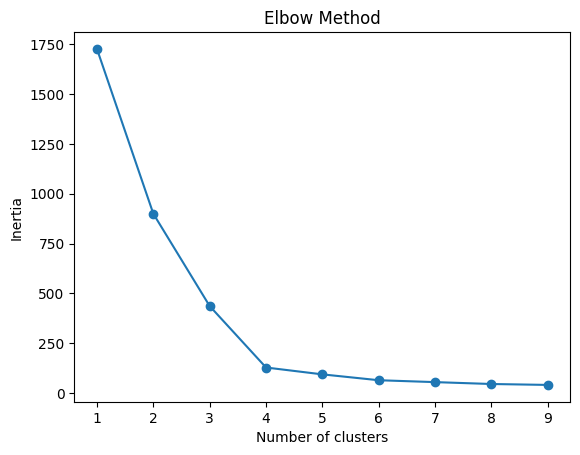

In [81]:
inertia = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## 5. Run k-means clustering alogorithm

Using the optimal number of clusters obtained from the previous step, run the k-means clustering algorithm once more on the preprocessed data.

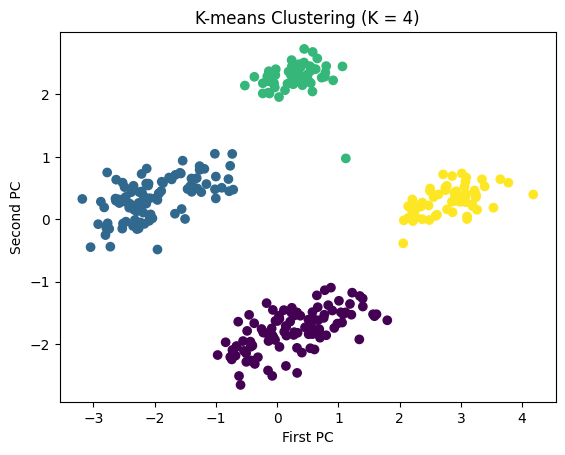

In [82]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], c=kmeans.labels_)
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('K-means Clustering (K = 4)')
plt.show()

## 6. Create final statistical DataFrame
Create a final characteristic DataFrame for each cluster using the groupby method and mean function only on numeric columns.

In [83]:
penguins_clean['label'] = kmeans.labels_

numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()

print(stat_penguins.head())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm
label                                                      
0             43.878302        19.111321         194.764151
1             40.217757        17.611215         189.046729
2             45.545763        14.262712         212.779661
3             49.473770        15.718033         221.540984
